# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

In [3]:
# Buscamos pronosticar el año en curso, 2021
# Por esta razón incluiremos años en el intevalo cerrado 2017-2019
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [4]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [5]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [6]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [7]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [8]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### **Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:**

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [11]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [12]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [14]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


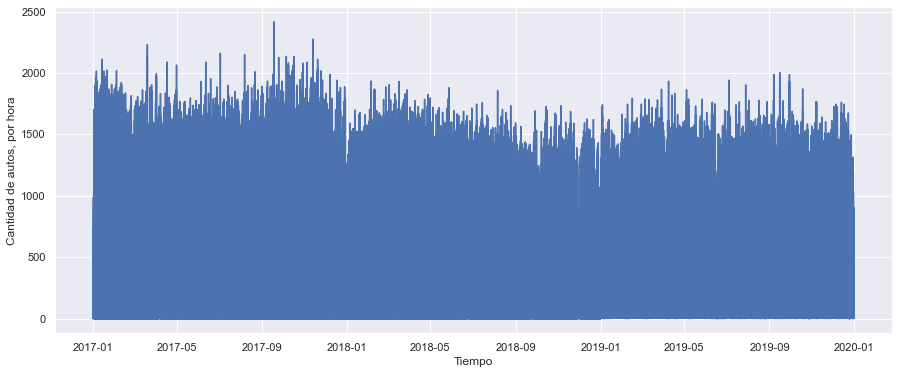

In [15]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [16]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


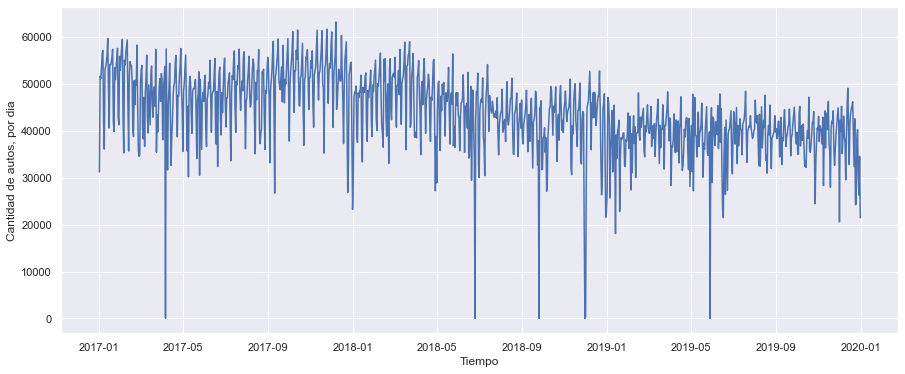

In [17]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

# Flujo de tráfico de automóviles durante los últimos 5 años  

Text(0.5, 0, 'lag')

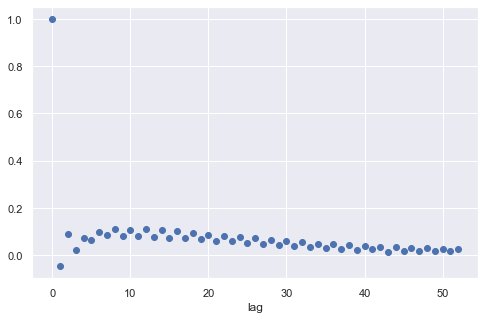

In [18]:
# Buscamos autocorrelaciones
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

nlags =  52
autocorr = acf(dataset.cantidad_pasos, nlags = nlags, fft=False)
autocorr.shape
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

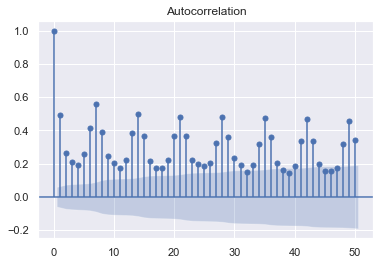

In [19]:
plot_acf(diario.cantidad_pasos, lags = 50)
plt.show()

# Para el ciclo semanal vemos que hay una relación
# Al predecir un día de la semana, es importante tener presente el mismo día en semanas anteriores  

In [20]:
diario_check = diario.copy()
diario_check.reset_index(inplace=True)
diario_check['data_check']=diario_check.fecha.diff()
diario_check['data_check'].value_counts()

# Datos completos, diferencia de un dia

1 days    1094
Name: data_check, dtype: int64

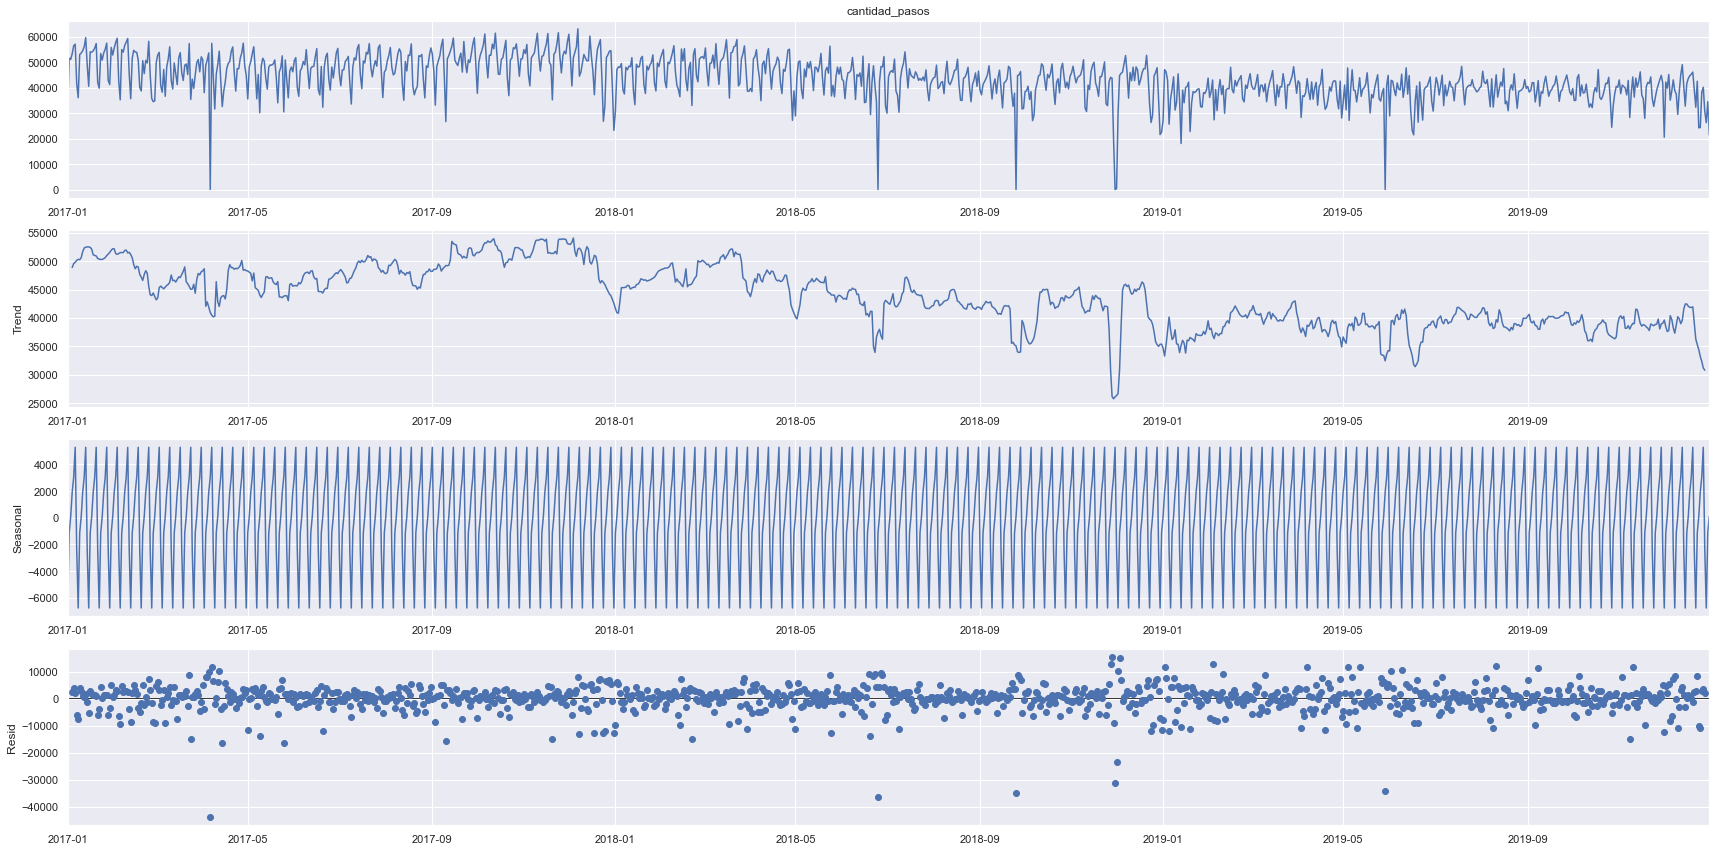

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='aditive')
plt.rcParams['figure.figsize'] = [24,12]
result.plot()
plt.show()

# Descomponemos la serie
# Tenemos 3 conclusiones:
# Hay una tendencia negativa, la cantidad de vehiculos disminuye con el tiempo 
# Cada año parece tener tendencia similar
# La serie tiene una tendencia semanal
# Tenemos ruido blanco

In [22]:
# Realizamos prueba Dickey Fuller
from statsmodels.tsa.stattools import adfuller

xx = dataset.cantidad_pasos
result = adfuller(xx)
print("Adf: ", result[0])
print('p-value: ', result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# Con Adf -23.919 vemos que la serie no es estacionaria y tampoco depende del tiempo

Adf:  -23.91948067960336
p-value:  0.0
Critical Values: 
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [23]:
# Empezamos explorando el dataset preparado
dataset.describe(include="all", datetime_is_numeric=True)

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
count,238869,238869,238869,238869.000000,238869
unique,7,2,2,NaN,NaN
top,Viernes,Centro,Pesado,NaN,NaN
freq,35196,127696,151521,NaN,NaN
mean,NaN,NaN,NaN,200.384232,2018-03-15 14:11:58.616480512
min,NaN,NaN,NaN,1.000000,2017-01-01 00:00:00
25%,NaN,NaN,NaN,2.000000,2017-07-23 10:00:00
50%,NaN,NaN,NaN,11.000000,2018-02-24 18:00:00
75%,NaN,NaN,NaN,104.000000,2018-09-28 04:00:00
max,NaN,NaN,NaN,2416.000000,2019-12-31 23:00:00


In [24]:
dataset.shape

(238869, 5)

In [25]:
dataset.isnull().sum()
# No hay missing values

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64

In [26]:
diario_mis = diario.copy()
diario_mis.describe()
# Tendremos en cuenta solo cantidad_pasos menor o igual a 15000

,cantidad_pasos
count,1095.000000
mean,43712.859361
std,8192.736927
min,0.000000
25%,39061.500000
50%,43761.000000
75%,49498.000000
max,63127.000000


In [27]:
diario_mis = diario[diario.cantidad_pasos <= 10000]
diario_mis

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-30,0
2018-12-01,350
2019-05-29,0


In [28]:
# Queremos ver el la cantidad vehiculos (cantidad_pasos)
# en estacion Illia
# de acuerdo a la forma de pago

In [29]:
mis_17 = data_2017[(data_2017.estacion== 'Illia') & (data_2017.fecha== '2017-04-06')]
mis_17= mis_17.loc[:,['forma_pago', 'cantidad_pasos']]
mis_17.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending= False)

# El mayor volumen de pasos fue no cobrado
# De los cobrados, la gran mayoría o casi totalidad fue por telepase

,cantidad_pasos
forma_pago,
NO COBRADO,45961
TELEPASE,19296
EFECTIVO,40
EXENTO,1


In [30]:
mis_18 = data_2018[(data_2018.estacion== 'Illia') & (data_2018.fecha== '2018-06-25')]
mis_18= mis_18.loc[:,['forma_pago', 'cantidad_pasos']]
mis_18.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending= False)

# Repetimos el ejercicio para la segunda fecha
# Encontramos que no hubo pagos durante ese periodo

,cantidad_pasos
forma_pago,
NO COBRADO,85099


In [31]:
mis_18 = data_2018[(data_2018.estacion== 'Illia') & (data_2018.fecha== '2018-09-25')]
mis_18= mis_18.loc[:,['forma_pago', 'cantidad_pasos']]
mis_18.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending= False)

# Repetimos el ejercicio para la tercera fecha
# Encontramos que no hubo pagos durante ese periodo

,cantidad_pasos
forma_pago,
NO COBRADO,78690


In [32]:
mis_18 = data_2018[(data_2018.estacion== 'Illia') & (data_2018.fecha== '2018-11-30')]
mis_18= mis_18.loc[:,['forma_pago', 'cantidad_pasos']]
mis_18.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending= False)

# Repetimos el ejercicio para la cuerta fecha
# Encontramos que no hubo pagos durante ese periodo

,cantidad_pasos
forma_pago,
NO COBRADO,387


In [33]:
mis_18 = data_2018[(data_2018.estacion== 'Illia') & (data_2018.fecha== '2018-12-01')]
mis_18= mis_18.loc[:,['forma_pago', 'cantidad_pasos']]
mis_18.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending= False)

# Repetimos el ejercicio para la quinta fecha
# Encontramos que no hubo pagos durante ese periodo
# Aparecen nuevas formas de pago
# solo 350 pasos en efectivo 

,cantidad_pasos
forma_pago,
NO COBRADO,464
EFECTIVO,350
TELEPASE,290
EXENTO,9
INFRACCION,5
TARJETA DISCAPACIDAD,3


In [34]:
falta_19 = data_2019[(data_2019.estacion== 'Illia') & (data_2019.fecha== '2019-05-29')]
falta_19= falta_19.loc[:,['forma_pago', 'cantidad_pasos']]
falta_19.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending= False)

# Repetimos el ejercicio para la sexta fecha
# Encontramos que no hubo pagos durante ese periodo

,cantidad_pasos
forma_pago,
NO COBRADO,87419


In [35]:
# Empezamos a transformar datos NaN para normalizar

diario.cantidad_pasos[diario.cantidad_pasos<= 10000]= np.nan
print(diario.isnull().sum())

cantidad_pasos    6
dtype: int64


In [36]:
diario= diario.interpolate(method='nearest', k=2)
diario.isnull().sum()

cantidad_pasos    0
dtype: int64

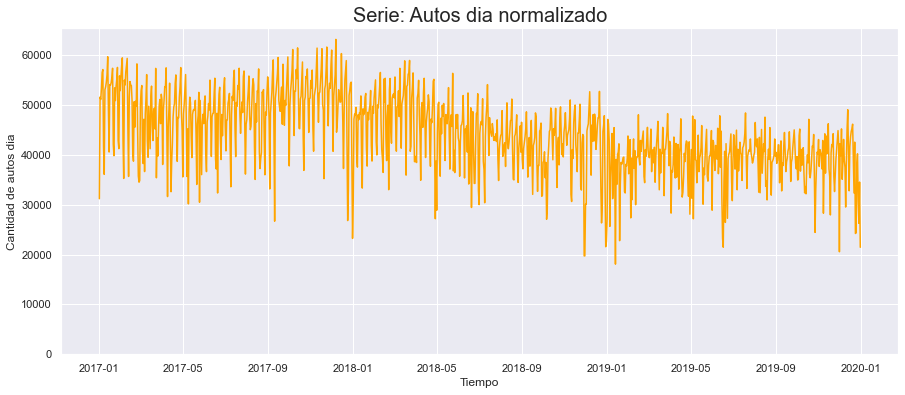

In [37]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos, color='orange')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos dia')
plt.title('Serie: Autos dia normalizado', size= 20)
plt.ylim(ymin=0)
plt.show()

In [38]:
# Buscamos día con mayor tráfico
mask = dataset[dataset.cantidad_pasos>= (dataset.cantidad_pasos.mean()+ dataset.cantidad_pasos.std())]
mask

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
11,Domingo,Centro,Liviano,857,2017-01-01 00:00:00
16,Domingo,Centro,Liviano,783,2017-01-01 02:00:00
19,Domingo,Provincia,Liviano,704,2017-01-01 03:00:00
22,Domingo,Centro,Liviano,988,2017-01-01 03:00:00
...,...,...,...,...,...
238850,Martes,Provincia,Liviano,643,2019-12-31 18:00:00
238854,Martes,Provincia,Liviano,640,2019-12-31 19:00:00
238858,Martes,Provincia,Liviano,773,2019-12-31 20:00:00
238861,Martes,Provincia,Liviano,905,2019-12-31 21:00:00


In [39]:
mask.groupby('dia').sum().sort_values('cantidad_pasos', ascending=False)
# Como se esperaba el inicio de fin de semana es el día con mayor tráfico
# Tráfico normal diario + tráfico de viajes fin de semana

,cantidad_pasos
dia,
Viernes,6260472
Jueves,5892907
Miércoles,5674526
Martes,5442516
Lunes,5225756
Sábado,5182949
Domingo,4299132


In [40]:
# Mismo ejercicio pero con la hora más transcurrida

mask.groupby('fecha').sum().sort_values('cantidad_pasos', ascending= False)

,cantidad_pasos
fecha,
2017-10-05 18:00:00,3842
2017-10-13 15:00:00,3794
2017-11-17 14:00:00,3738
2017-12-07 16:00:00,3726
2017-10-13 16:00:00,3629
...,...
2019-10-24 23:00:00,604
2018-03-10 00:00:00,604
2018-02-12 09:00:00,604


In [41]:
# Las 6 de la tarde para el día 2017-10-05 fue el momento más transcurrido

<AxesSubplot:xlabel='sentido', ylabel='count'>

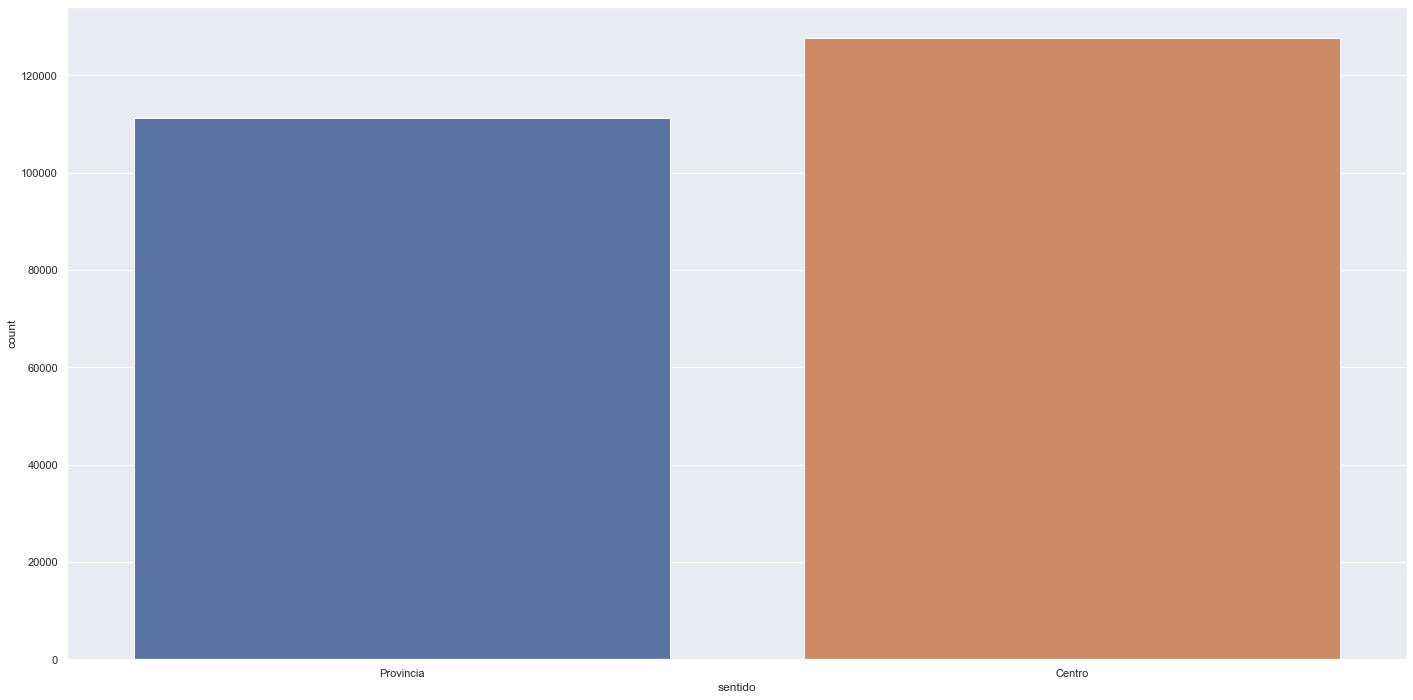

In [42]:
sns.countplot(dataset.sentido)

# Sentido más transcurrido: Centro
# Posiblemente el centro tambien tiene una gran concentración de lugares de trabajo

In [43]:
# Fecha con mayores registros
mask = diario[diario.cantidad_pasos>=(diario.cantidad_pasos.mean()+ diario.cantidad_pasos.std())]
mask.sort_values('cantidad_pasos',ascending= False)

,cantidad_pasos
fecha,
2017-12-07,63127.0
2017-11-24,61594.0
2017-10-13,61421.0
2017-11-10,61382.0
2017-11-17,61259.0
...,...
2017-09-19,51556.0
2018-01-18,51548.0
2017-02-13,51546.0


In [44]:
# 2017-12-07 coincide con periodo de fin de año
# Periodo con alto tráfico

In [45]:
# Vemos ahora, método de pago por año (solo estación illia)
data17= data_2017.copy()
data17= data17[data17.estacion== 'Illia']
data17

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
1749,2017,2017-01-01,0,1,Domingo,Illia,Centro,Liviano,NO COBRADO,252
1750,2017,2017-01-01,0,1,Domingo,Illia,Centro,Liviano,EFECTIVO,1
1751,2017,2017-01-01,0,1,Domingo,Illia,Centro,Liviano,TELEPASE,100
1752,2017,2017-01-01,0,1,Domingo,Illia,Centro,Pesado,TELEPASE,2
1753,2017,2017-01-01,0,1,Domingo,Illia,Centro,Pesado,TELEPASE,1
...,...,...,...,...,...,...,...,...,...,...
1372324,2017,2017-12-31,22,23,Domingo,Illia,Provincia,Pesado,EFECTIVO,1
1372325,2017,2017-12-31,22,23,Domingo,Illia,Provincia,Pesado,TELEPASE,2
1372326,2017,2017-12-31,22,23,Domingo,Illia,Provincia,Pesado,EFECTIVO,1
1372327,2017,2017-12-31,23,0,Domingo,Illia,Provincia,Liviano,NO COBRADO,99


In [46]:
data17.describe(include= 'all')

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
count,291900.0,291900,291900.000000,291900.000000,291900,291900,291900,291900,291900,291900.000000
unique,NaN,365,NaN,NaN,7,1,2,2,7,NaN
top,NaN,2017-01-30,NaN,NaN,Viernes,Illia,Centro,Pesado,EFECTIVO,NaN
freq,NaN,906,NaN,NaN,43944,291900,160328,161166,104230,NaN
mean,2017.0,NaN,11.951011,12.080877,NaN,NaN,NaN,NaN,NaN,115.007139
std,0.0,NaN,6.535413,6.603749,NaN,NaN,NaN,NaN,NaN,347.277410
min,2017.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2017.0,NaN,7.000000,7.000000,NaN,NaN,NaN,NaN,NaN,2.000000
50%,2017.0,NaN,12.000000,12.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,2017.0,NaN,17.000000,18.000000,NaN,NaN,NaN,NaN,NaN,23.000000


In [47]:
# Se cree que la brecha entre efectivo y telepase será:
# cada vez menor
# hasta el punto donde telepase sea el metodo de pago más usado 
data17['forma_pago'].value_counts()

EFECTIVO                104230
TELEPASE                 79903
EXENTO                   39201
INFRACCION               24526
TARJETA DISCAPACIDAD     22145
NO COBRADO               21881
MONEDERO                    14
Name: forma_pago, dtype: int64

In [48]:
data18= data_2018.copy()
data18=data18[data18.estacion=='Illia']
data18

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
1768,2018,2018-01-01,0,1,Lunes,Illia,Centro,Liviano,NO COBRADO,127
1769,2018,2018-01-01,0,1,Lunes,Illia,Centro,Liviano,EFECTIVO,8
1770,2018,2018-01-01,0,1,Lunes,Illia,Centro,Liviano,TELEPASE,68
1771,2018,2018-01-01,0,1,Lunes,Illia,Centro,Pesado,TELEPASE,1
1772,2018,2018-01-01,1,2,Lunes,Illia,Centro,Liviano,NO COBRADO,3
...,...,...,...,...,...,...,...,...,...,...
1375532,2018,2018-12-31,22,23,Lunes,Illia,Provincia,Pesado,TELEPASE,3
1375533,2018,2018-12-31,23,0,Lunes,Illia,Provincia,Liviano,NO COBRADO,95
1375534,2018,2018-12-31,23,0,Lunes,Illia,Provincia,Liviano,EFECTIVO,4
1375535,2018,2018-12-31,23,0,Lunes,Illia,Provincia,Liviano,INFRACCION,1


In [49]:
data18.describe(include='all')

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
count,299519.0,299519,299519.000000,299519.000000,299519,299519,299519,299519,299519,299519.000000
unique,NaN,365,NaN,NaN,7,1,2,2,6,NaN
top,NaN,2018-10-05,NaN,NaN,Miércoles,Illia,Centro,Pesado,EFECTIVO,NaN
freq,NaN,960,NaN,NaN,45522,299519,154648,163619,99996,NaN
mean,2018.0,NaN,11.932589,12.045807,NaN,NaN,NaN,NaN,NaN,115.151419
std,0.0,NaN,6.552504,6.618378,NaN,NaN,NaN,NaN,NaN,354.717350
min,2018.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2018.0,NaN,7.000000,7.000000,NaN,NaN,NaN,NaN,NaN,2.000000
50%,2018.0,NaN,12.000000,12.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,2018.0,NaN,17.000000,18.000000,NaN,NaN,NaN,NaN,NaN,20.000000


In [50]:
data18['forma_pago'].value_counts()

EFECTIVO                99996
TELEPASE                89921
EXENTO                  37498
INFRACCION              29459
NO COBRADO              23454
TARJETA DISCAPACIDAD    19191
Name: forma_pago, dtype: int64

In [51]:
data19=data_2019.copy()
data19=data19[data19.estacion=='Illia']
data19

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019,2019-01-01,0,1,Martes,Illia,Centro,Liviano,NO COBRADO,146
20,2019,2019-01-01,0,1,Martes,Illia,Centro,Liviano,TELEPASE,59
21,2019,2019-01-01,0,1,Martes,Illia,Centro,Pesado,TELEPASE,1
22,2019,2019-01-01,0,1,Martes,Illia,Provincia,Liviano,NO COBRADO,147
23,2019,2019-01-01,0,1,Martes,Illia,Provincia,Liviano,TELEPASE,106
...,...,...,...,...,...,...,...,...,...,...
812133,2019,2019-12-31,23,0,Martes,Illia,Centro,Liviano,TELEPASE,39
812134,2019,2019-12-31,23,0,Martes,Illia,Centro,Pesado,TELEPASE,2
812135,2019,2019-12-31,23,0,Martes,Illia,Provincia,Liviano,NO COBRADO,145
812136,2019,2019-12-31,23,0,Martes,Illia,Provincia,Liviano,TELEPASE,26


In [52]:
data19.describe(include='all')

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
count,161133.0,161133,161133.000000,161133.000000,161133,161133,161133,161133,161133,161133.000000
unique,NaN,365,NaN,NaN,7,1,2,2,6,NaN
top,NaN,2019-03-15,NaN,NaN,Martes,Illia,Provincia,Liviano,TELEPASE,NaN
freq,NaN,480,NaN,NaN,23602,161133,81283,100861,34788,NaN
mean,2019.0,NaN,11.770004,11.827180,NaN,NaN,NaN,NaN,NaN,211.968790
std,0.0,NaN,6.718099,6.759874,NaN,NaN,NaN,NaN,NaN,488.961921
min,2019.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2019.0,NaN,6.000000,6.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,2019.0,NaN,12.000000,12.000000,NaN,NaN,NaN,NaN,NaN,12.000000
75%,2019.0,NaN,17.000000,18.000000,NaN,NaN,NaN,NaN,NaN,68.000000


In [53]:
data19['forma_pago'].value_counts()

TELEPASE           34788
EFECTIVO           34643
EXENTO             29204
INFRACCION         24015
NO COBRADO         21344
T. DISCAPACIDAD    17139
Name: forma_pago, dtype: int64

In [54]:
# Vamos que efectivamente el método de pago telepase
# supera, por primer año al efectivo
# factores como:
# agilidad el proceso por el peaje
# mayor comodidad
# Impulsan el uso de telepase

In [55]:
pagos = pd.concat([data_2019, data_2018, data_2017])

mask = np.logical_and(pagos.estacion=='Illia', pagos.forma_pago == 'TELEPASE')
pagos = pagos[mask]


pagos.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

pagos['fecha2'] = pd.to_datetime(pagos.fecha) + pd.to_timedelta(pagos.hora_fin, unit = 'h')

pagos.drop(columns=['fecha','hora_fin'], inplace = True)

pagos.rename(columns = {'fecha2':'fecha'}, inplace = True) 

pagos.sort_values('fecha', inplace = True)
pagos.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi lograr una visualización mas amigable
pagos_d = pagos.resample('D', on = 'fecha').sum()

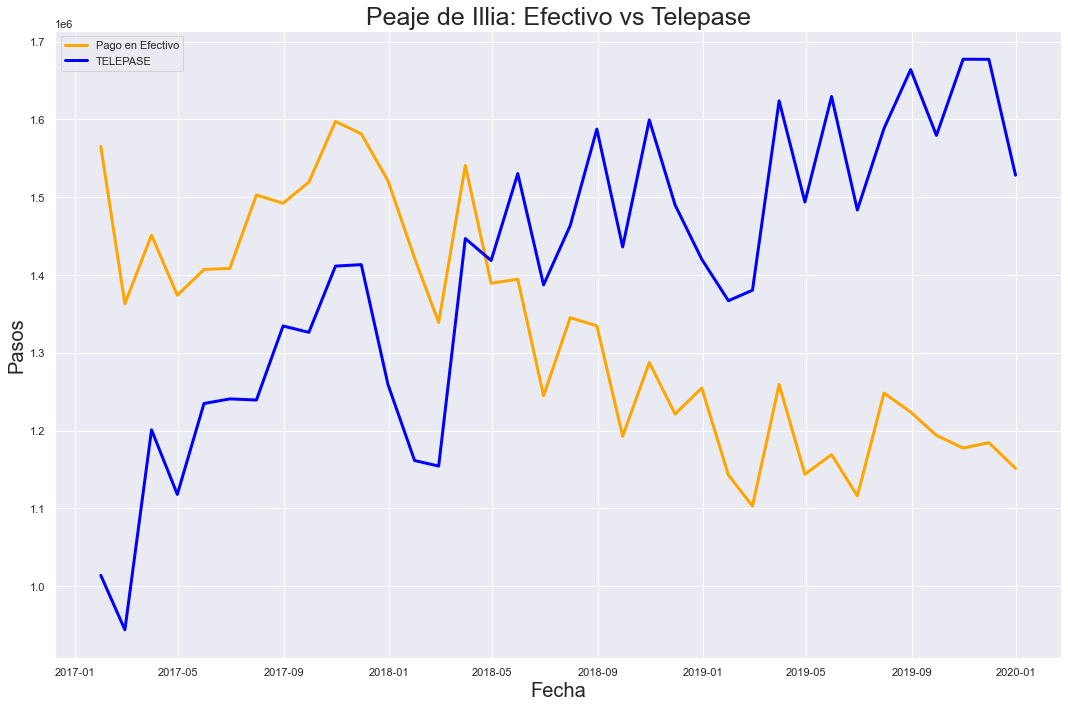

In [56]:
mensual= pagos.resample('M', on='fecha').sum()
mensual1= dataset.resample('M', on='fecha').sum()

plt.figure(figsize=(15,10))
plt.plot(mensual1.index, mensual1.cantidad_pasos,lw=3, color='orange', label='Pago en Efectivo')
plt.plot(mensual.index, mensual.cantidad_pasos, lw=3, color='blue', label='TELEPASE')
plt.title('Peaje de Illia: Efectivo vs Telepase', size=25)
plt.xlabel('Fecha', size= 20)
plt.ylabel('Pasos', size= 20)
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
# Vemos gráficamente que se cumple la hipótesis
# Hay una relación inversa entre los métodos de pago
# Mientras telepase crece, pago en efectivo disminuye

In [58]:
# Resampleo

In [59]:
sema = diario.resample('W').sum()
sema.shape
sema

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-08,347212.0
2017-01-15,366413.0
2017-01-22,357215.0
2017-01-29,354581.0
...,...
2019-12-08,282891.0
2019-12-15,272960.0
2019-12-22,292881.0


In [60]:
sema1 = dataset.resample('W', on='fecha').sum()
sema1.shape
sema1

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581
...,...
2019-12-08,282891
2019-12-15,272960
2019-12-22,292881


In [61]:
import matplotlib.gridspec as gridspec

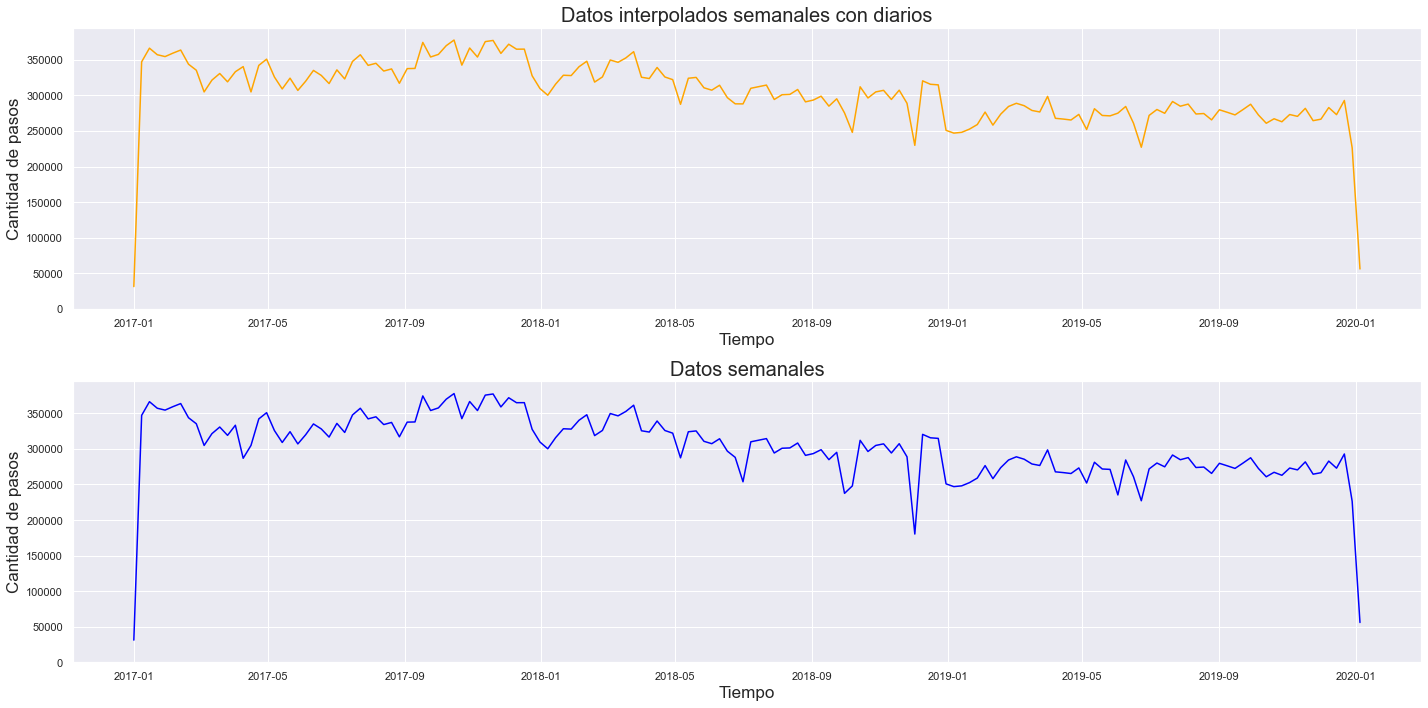

In [62]:
plt.figure(figsize=(20,10))
g = gridspec.GridSpec(2,1)
ax0 = plt.subplot(g[0])
plt.plot(sema.index, sema.cantidad_pasos, color='orange')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Datos interpolados semanales con diarios', size= 20)
plt.ylim(0)

ax1 = plt.subplot(g[1])
plt.plot(sema1.index, sema1.cantidad_pasos, color= 'blue')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Datos semanales', size=20)
plt.ylim(0)
plt.tight_layout()
plt.show()

In [63]:
# Aunque no se ven muy diferentes los gráficos
# decidimos quedarnos con los datos interpolados

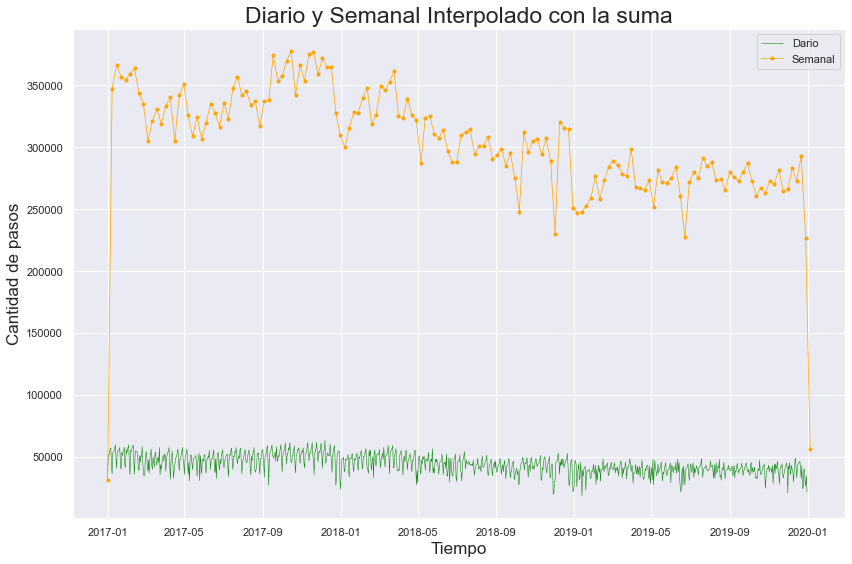

In [64]:
plt.figure(figsize=(12,8))
plt.plot(diario, linestyle='-', linewidth=0.5, label='Dario', color='green')
plt.plot(sema, marker='.', linestyle='-', linewidth=0.7, label='Semanal', color='orange')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Diario y Semanal Interpolado con la suma', size= 23)
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
sema_m = diario.resample('W').mean()
sema_m

# Resampleo con la media

,cantidad_pasos
fecha,
2017-01-01,31183.000000
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
...,...
2019-12-08,40413.000000
2019-12-15,38994.285714
2019-12-22,41840.142857


In [66]:
diario1=dataset.resample('D', on='fecha').sum()
sema_m1= diario1.resample('W').mean()
sema_m1

,cantidad_pasos
fecha,
2017-01-01,31183.000000
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
...,...
2019-12-08,40413.000000
2019-12-15,38994.285714
2019-12-22,41840.142857


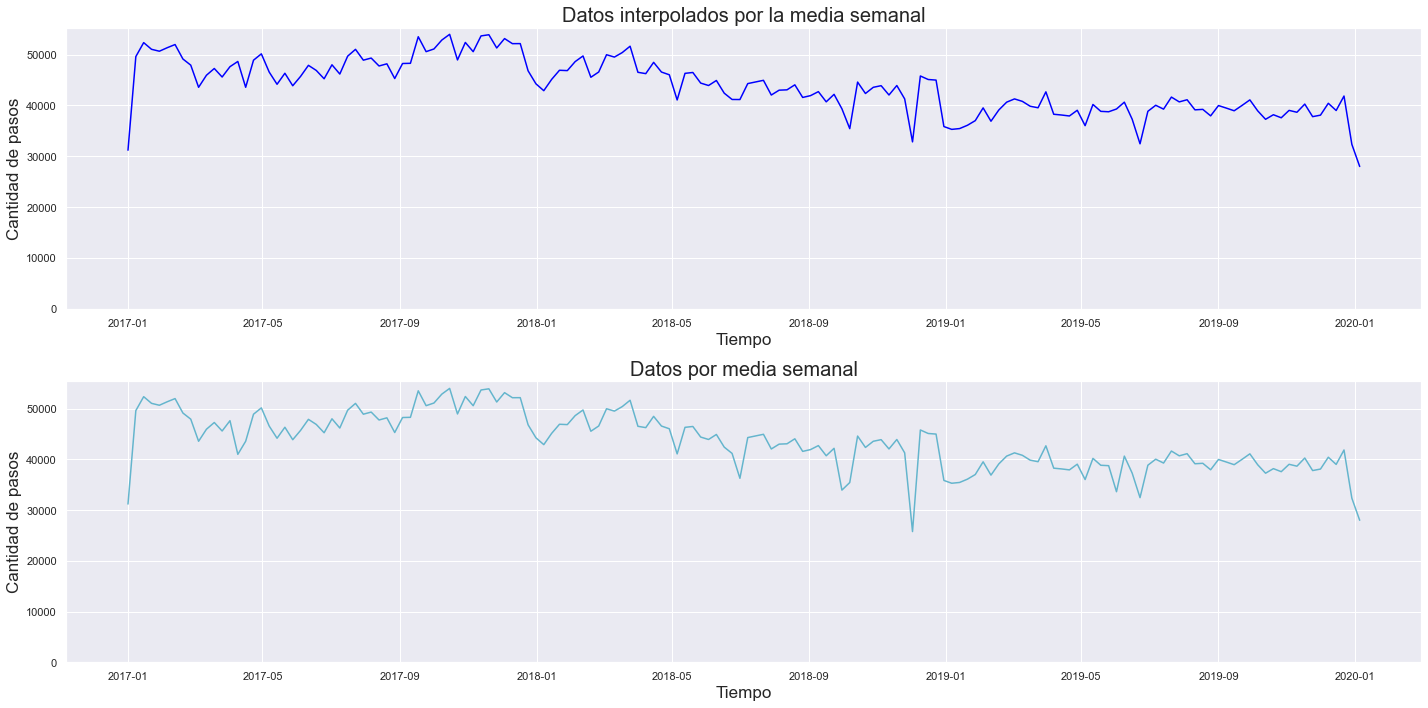

In [67]:
plt.figure(figsize=(20,10))
g= gridspec.GridSpec(2,1)
ax0= plt.subplot(g[0])
plt.plot(sema.index, sema_m.cantidad_pasos, color='blue')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Datos interpolados por la media semanal', size= 20)
plt.ylim(0)

ax1=plt.subplot(g[1])
plt.plot(sema1.index, sema_m1.cantidad_pasos, color= 'c')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Datos por media semanal', size=20)
plt.ylim(0)
plt.tight_layout()
plt.show()

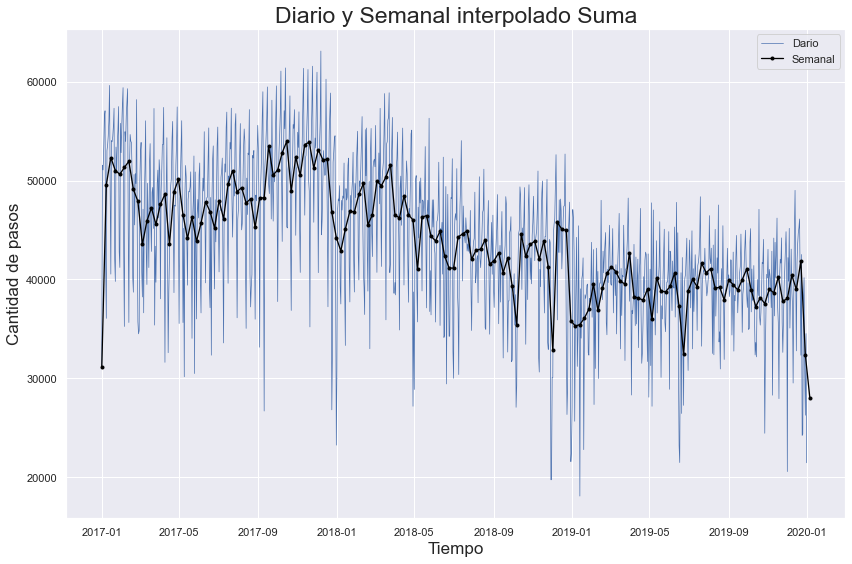

In [69]:
plt.figure(figsize=(12,8))
plt.plot(diario, linestyle='-', linewidth=0.7, label='Dario')
plt.plot(sema_m, marker='.', linestyle='-', linewidth=1.3, label='Semanal', color='black')
plt.xlabel('Tiempo', size= 17)
plt.ylabel('Cantidad de pasos', size= 17)
plt.title('Diario y Semanal interpolado Suma', size= 23)
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.tsa as tsa
# Descomposicion Multipicativa 
result_mul = tsa.seasonal.seasonal_decompose(diario.cantidad_pasos, model='multiplicative', extrapolate_trend='freq')

# Descomposicion Aditiva
result_add = tsa.seasonal.seasonal_decompose(diario.cantidad_pasos, model='additive', extrapolate_trend='freq')

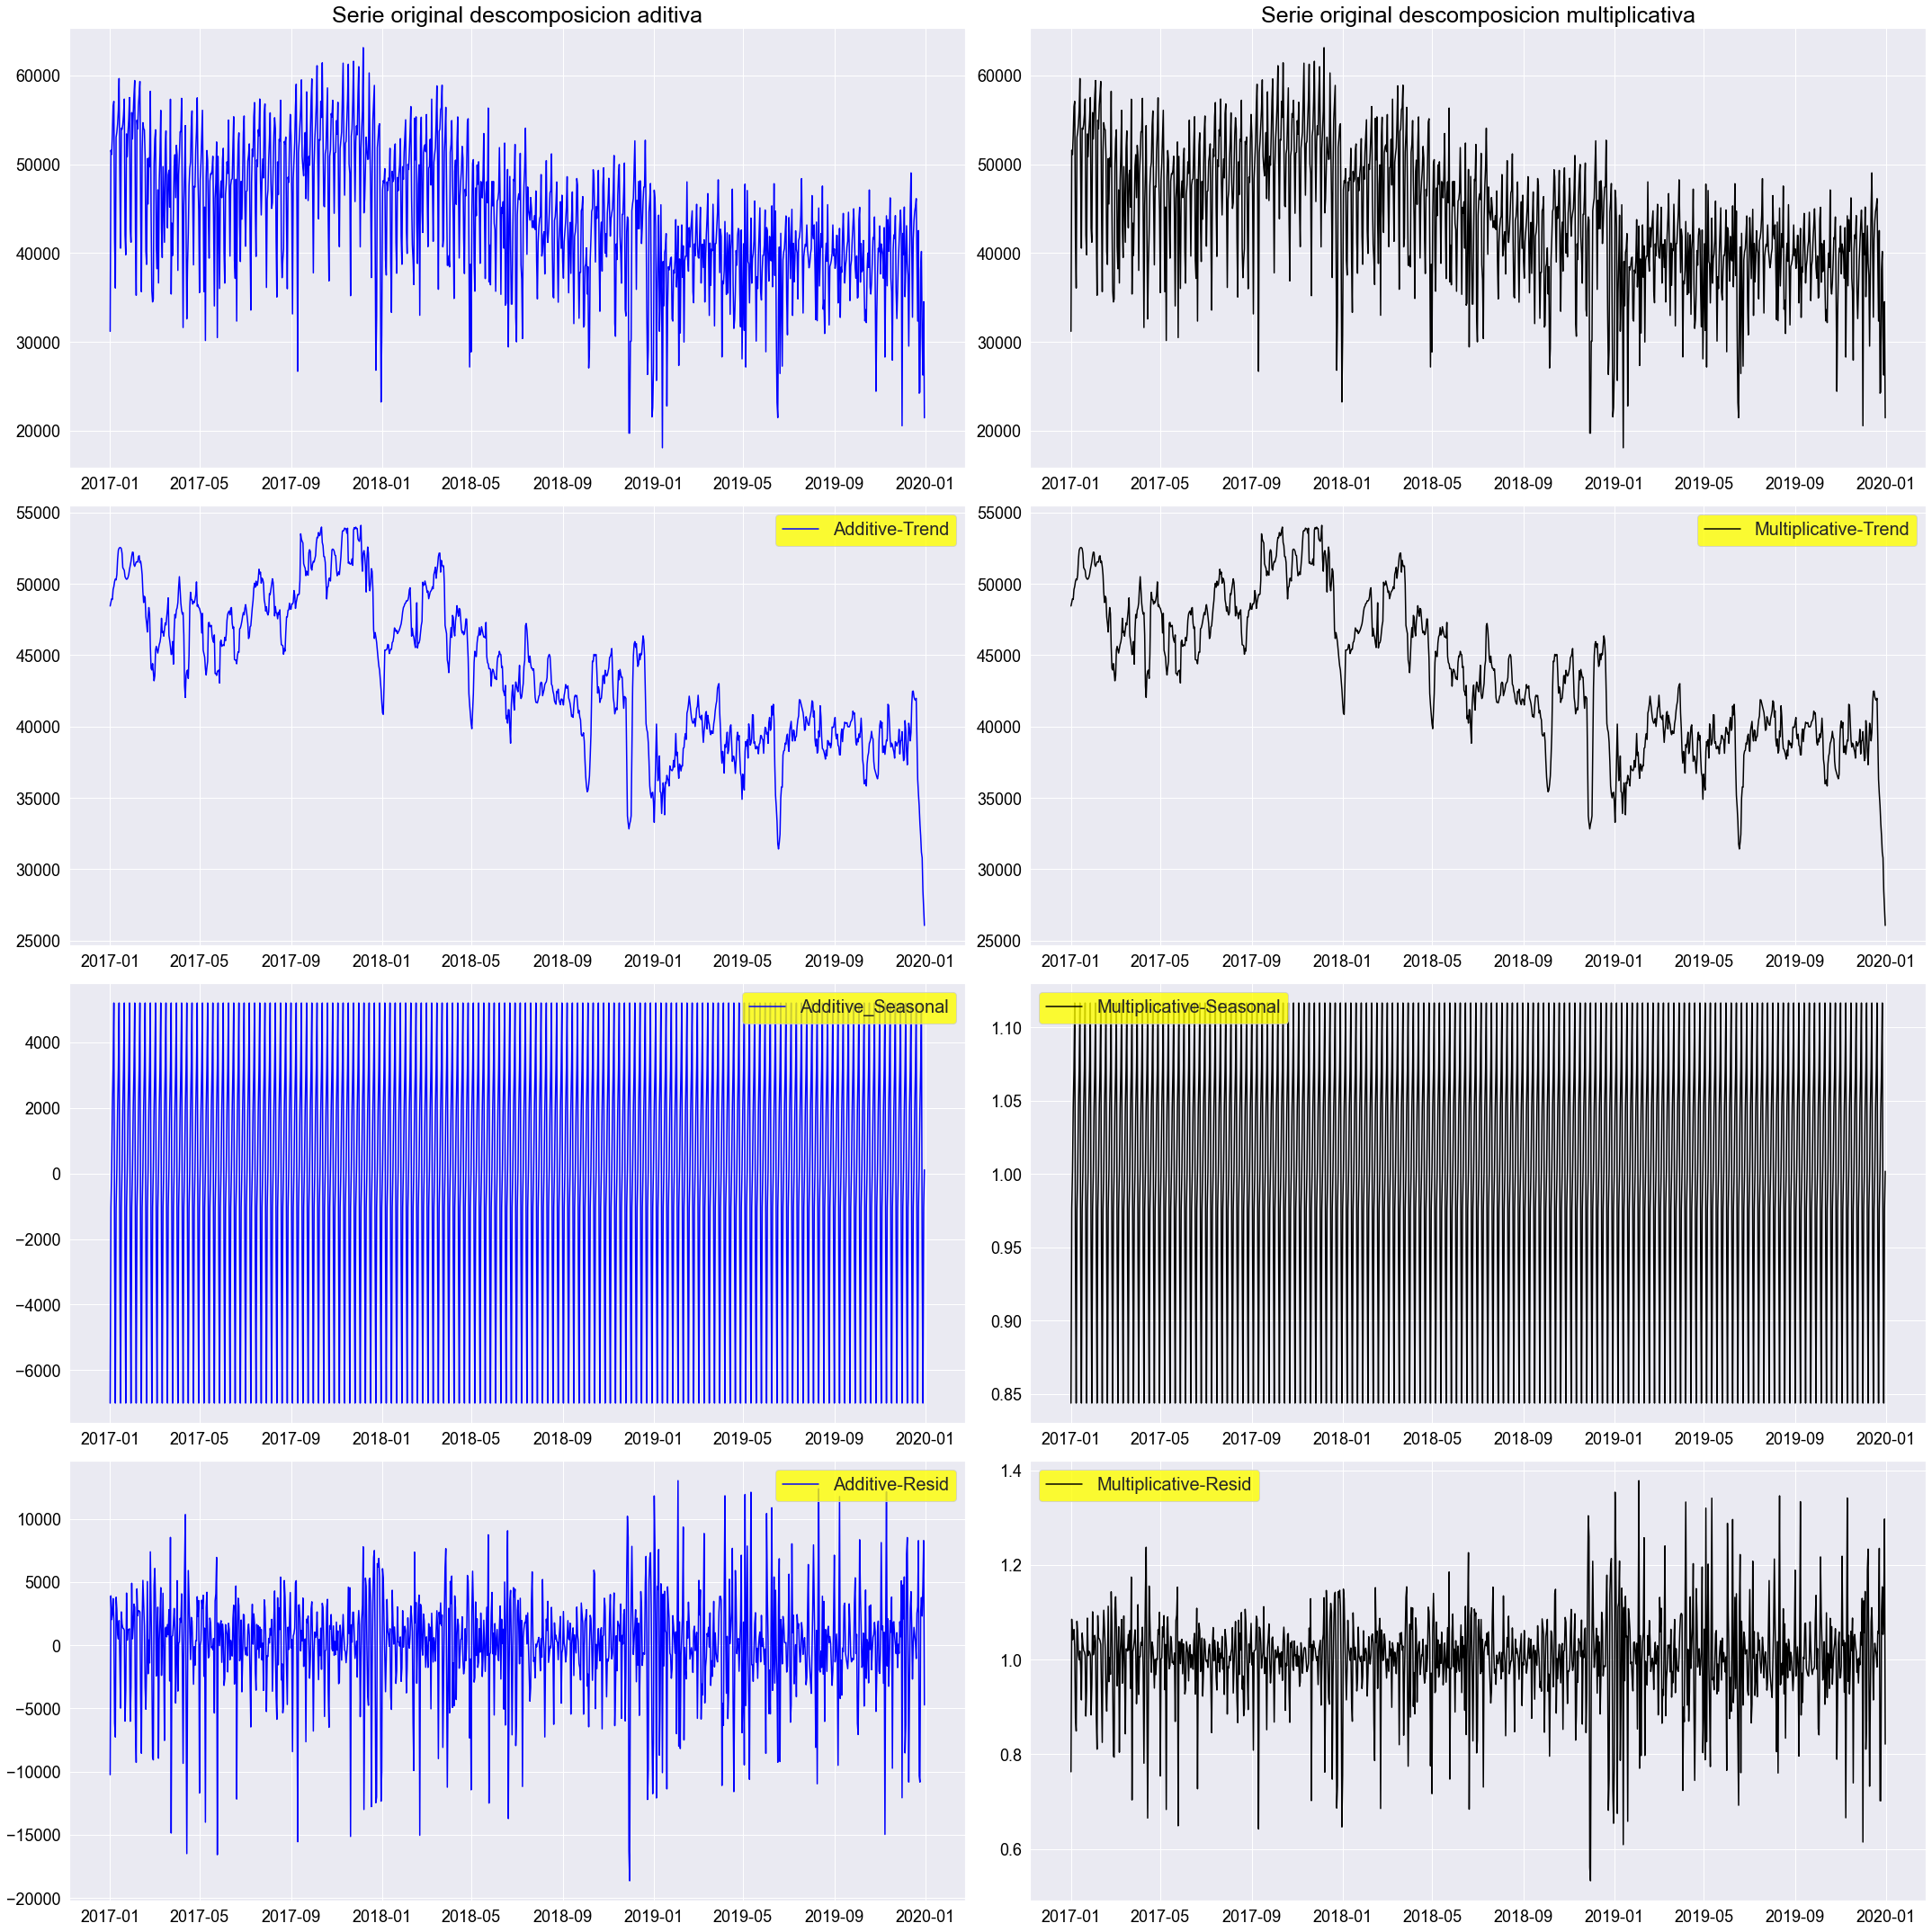

In [71]:
plt.figure(figsize = (30,30))
Gs= gridspec.GridSpec(4,2)

ax0= plt.subplot(Gs[0])
plt.plot(diario,color='blue')
plt.title("Serie original descomposicion aditiva", color= 'black', fontsize= 25)
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)

ax1= plt.subplot(Gs[1])
plt.plot(diario,color='black')
plt.title("Serie original descomposicion multiplicativa", color= 'black', fontsize= 25)
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)

ax2= plt.subplot(Gs[2])
plt.plot(result_add.trend,color='blue', label="Additive-Trend")
plt.legend(fontsize=20, facecolor= 'yellow')
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)

ax3= plt.subplot(Gs[3])
plt.plot(result_mul.trend,color='black', label='Multiplicative-Trend')
plt.legend(fontsize=20, facecolor= 'yellow')
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)

ax4= plt.subplot(Gs[4])
plt.plot(result_add.seasonal,color='blue', label='Additive_Seasonal')
plt.legend(fontsize=20, facecolor= 'yellow')
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)


ax5= plt.subplot(Gs[5])
plt.plot(result_mul.seasonal,color='black', label='Multiplicative-Seasonal')
plt.legend(fontsize=20, facecolor= 'yellow')
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)

ax6= plt.subplot(Gs[6])
plt.plot(result_add.resid,color='blue', label='Additive-Resid')
plt.legend(fontsize=20, facecolor= 'yellow', loc= 1)
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)

ax7= plt.subplot(Gs[7])
plt.plot(result_mul.resid,color='black', label='Multiplicative-Resid')
plt.legend(fontsize=20, facecolor= 'yellow', loc= 2)
plt.xticks( color= 'black', fontsize= 18)
plt.yticks( color= 'black', fontsize= 18)


plt.tight_layout()
plt.show()

In [72]:
# Serie aditiva es la que usaremos, ya que esta tiene media en cero, es Ruido Blanco
# la multiplicativa tiene media en 1, se descarta

In [73]:
dec = seasonal_decompose(sema_m.cantidad_pasos, model='additive')

In [74]:
dec.trend

fecha
2017-01-01   NaN
2017-01-08   NaN
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
              ..
2019-12-08   NaN
2019-12-15   NaN
2019-12-22   NaN
2019-12-29   NaN
2020-01-05   NaN
Freq: W-SUN, Name: trend, Length: 158, dtype: float64

In [75]:
dec.seasonal

fecha
2017-01-01   -4360.102709
2017-01-08   -5237.804632
2017-01-15   -3970.977023
2017-01-22   -2652.969468
2017-01-29   -2144.821803
                 ...     
2019-12-08    4268.610203
2019-12-15    4009.297703
2019-12-22    1383.071054
2019-12-29   -4360.102709
2020-01-05   -5237.804632
Freq: W-SUN, Name: seasonal, Length: 158, dtype: float64

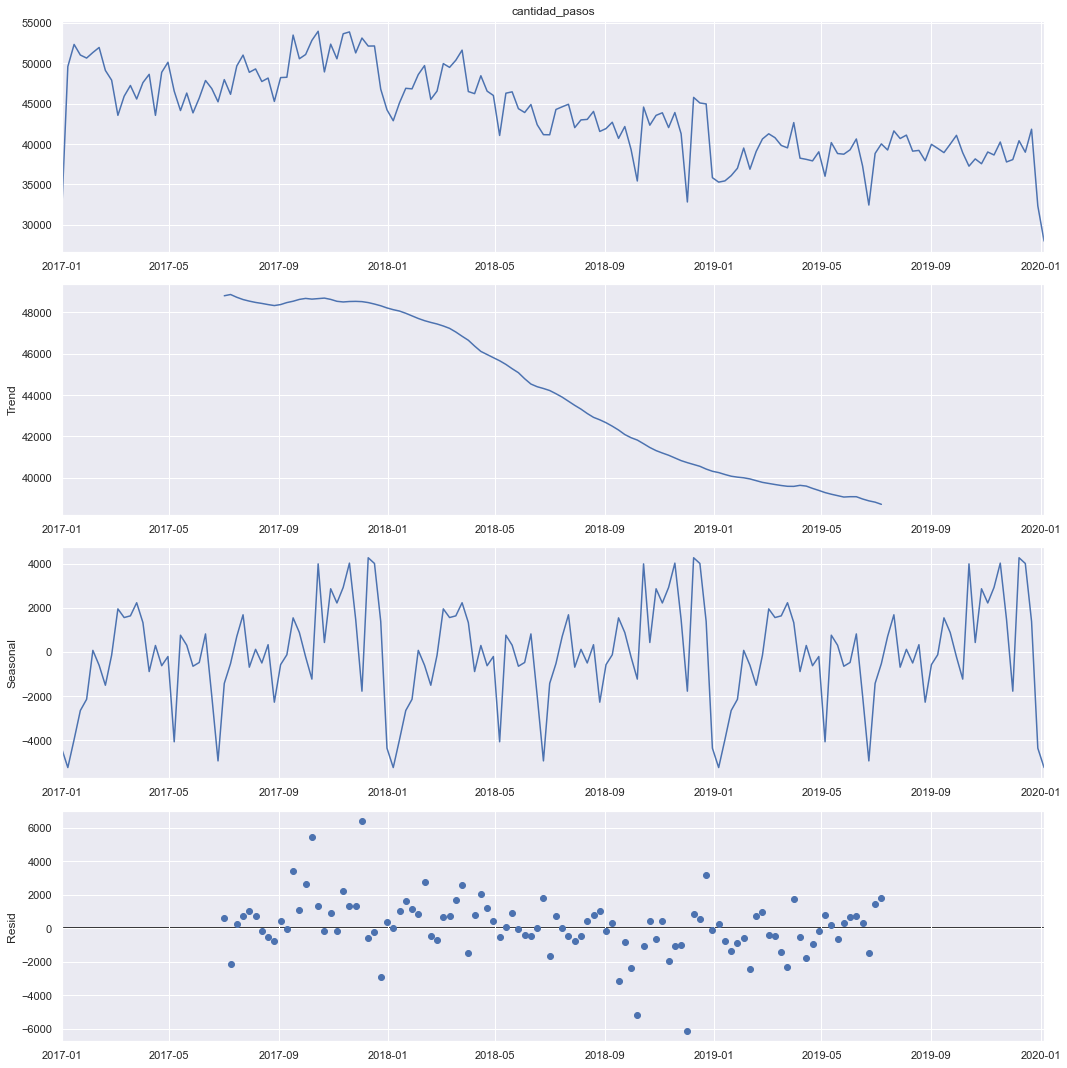

In [76]:
plt.rcParams['figure.figsize']= [15,15]
dec.plot()
plt.show()

In [77]:
# Conclusiones
# Tendencia es a la baja, pasos disminuyen con el tiempo, 
# la estacionalidad de la serie es anual
# Tenemos el ruido blanco, resid es totalmente al azar

In [79]:
# Autocorrelación

from statsmodels.tsa.stattools import acf

In [80]:
nlags= 52 *3
autoc= acf(sema_m.cantidad_pasos, nlags= nlags, fft=False)
autoc.shape

(157,)

Text(0.5, 0, 'lag')

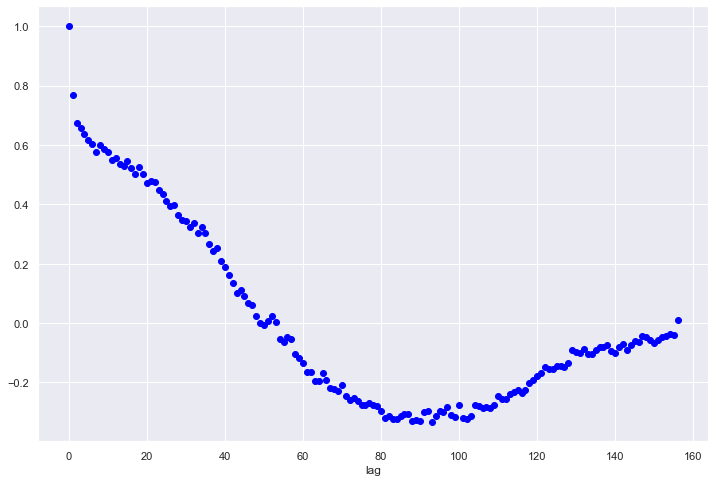

In [82]:
plt.figure(figsize = (12,8))
plt.scatter(np.arange(nlags+1), autoc, color='blue')
plt.xlabel('lag')

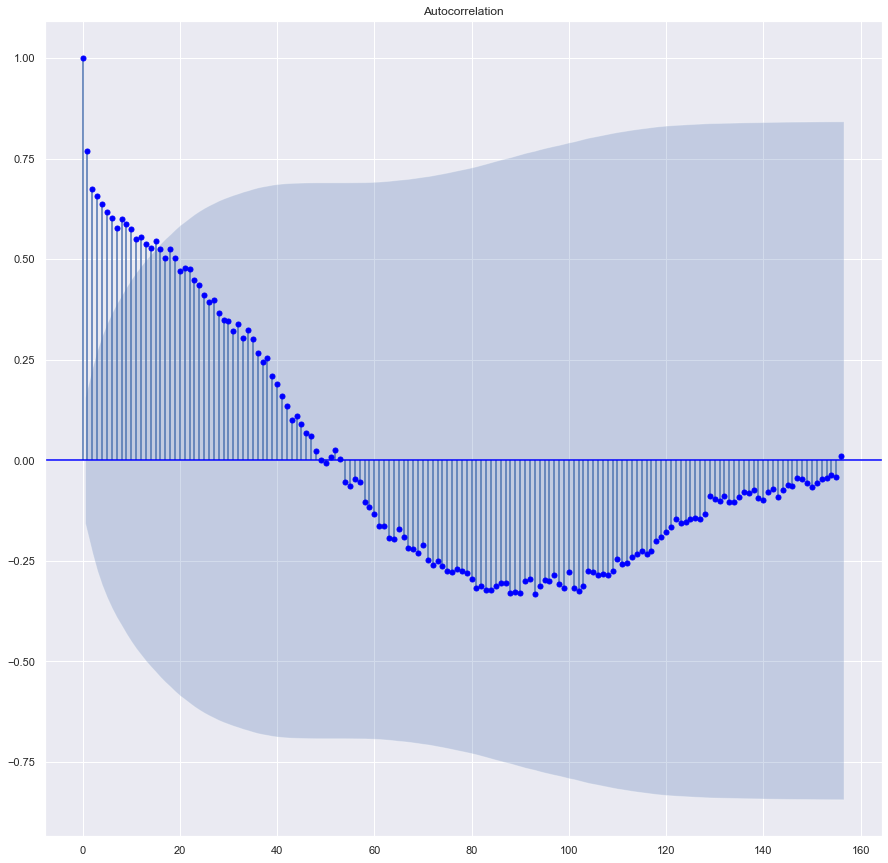

In [83]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sema_m.cantidad_pasos, lags = nlags, color='blue')
plt.show()

In [84]:
# Hay 16 rezagos que estan por fuera de las bandas de intervalo de confianza,
# La media movil podría presentar esta cantidad de rezagos
# MA media movil: 16 

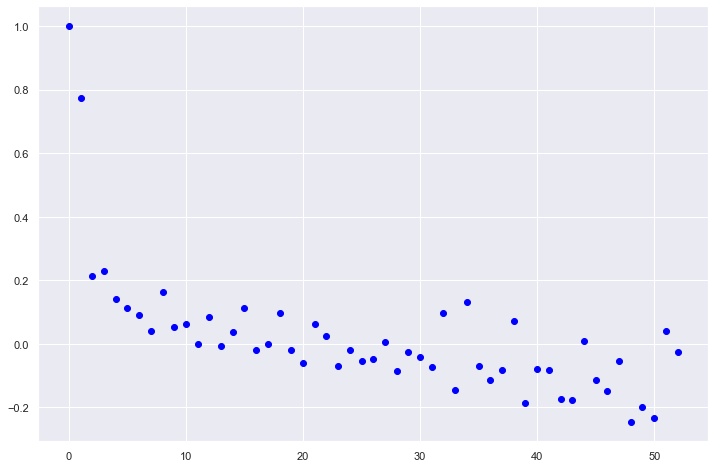

In [85]:
from statsmodels.tsa.stattools import pacf

Nlags= 52
pautoc= pacf(sema_m.cantidad_pasos, nlags= Nlags)
pautoc.shape

plt.figure(figsize=(12,8))
plt.scatter(np.arange(Nlags+1), pautoc, color='blue')
plt.show()

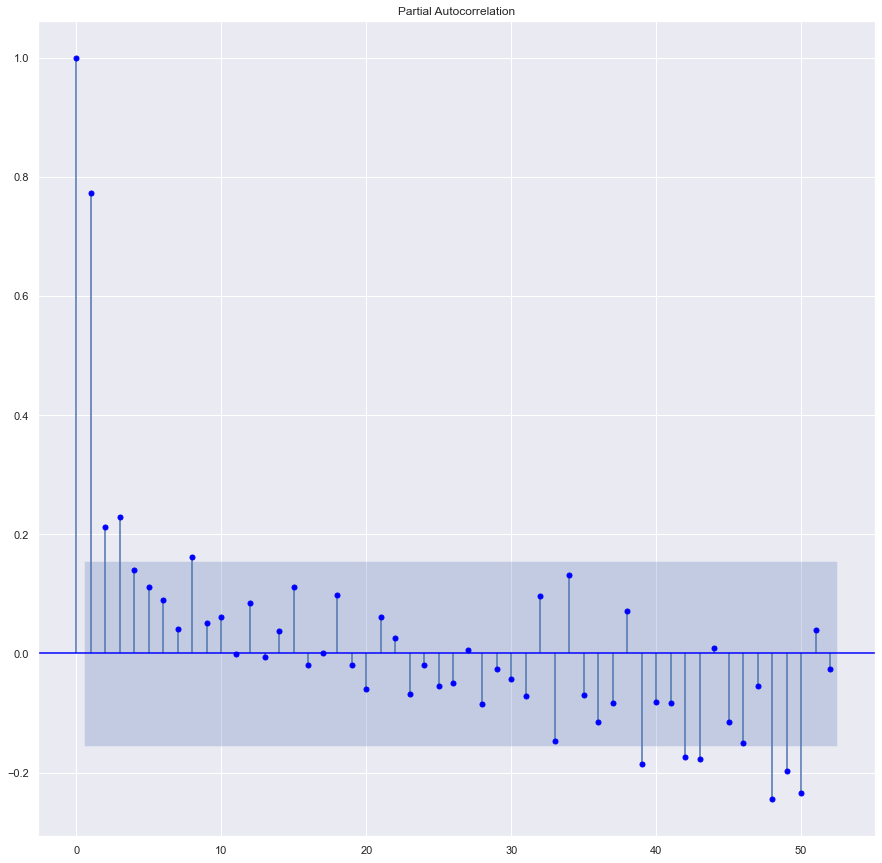

In [86]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(sema_m.cantidad_pasos, lags = Nlags, color='blue')
plt.show()

In [87]:
# AR proceso autoregresivo: 3

In [88]:
# MODELOS
# vamos a hacer un benchmark: regressor linal
# XGBoost 
# Random Forest

In [89]:
from sklearn.metrics import mean_squared_error

# Trimestre X
xi = '2019-07-01'
xf= '2019-09-30'
x= sema_m[(sema_m.index>=xi)&(sema_m.index<=xf)]

# Trimestre Y
yi= '2019-10-01'
yf= '2019-12-31'
Y= sema_m[(sema_m.index>=yi)&(sema_m.index<=yf)]

In [90]:
yt=x.cantidad_pasos.rolling(window=1, center=True).mean()
b_err=np.sqrt(mean_squared_error(Y,yt))
print('RMSE en Benchmark: ', b_err)

RMSE en Benchmark:  2999.8287232635216


In [91]:
# Se busca hacer una predicción del ultimo trimestre del 2019

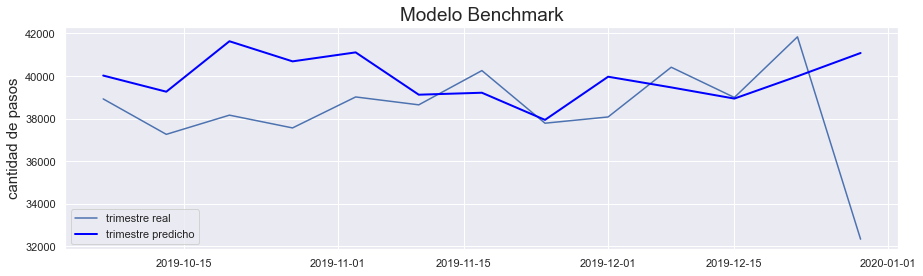

In [93]:
# Como se ve nuestra prediccion graficamente
plt.figure(figsize=(13,4))
plt.plot(Y.index, Y.cantidad_pasos, label='trimestre real')
plt.plot(Y.index, yt, lw=2, color='blue', label='trimestre predicho')
plt.title('Modelo Benchmark', size= 19)
plt.ylabel('cantidad de pasos', size= 15)
plt.legend()
plt.tight_layout()
plt.show()

In [94]:
# Modelo se comporta de forma esperada para el periodo predicho
# Buena señal
# Simplificamos dataset y excluimos periodos inicial y final con tendencias pronunciadas

In [97]:
sema_m = sema_m[(sema_m.index >='2017-01-08')&(sema_m.index<='2019-12-29')]
sema_m

,cantidad_pasos
fecha,
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
2017-02-05,51343.000000
...,...
2019-12-01,38079.285714
2019-12-08,40413.000000
2019-12-15,38994.285714


In [98]:
sen = sema_m.cantidad_pasos
sen.shape

(156,)

In [99]:
lb= 15

In [100]:
n = sen.shape[0]
X = np.zeros((n - lb - 1,lb))
y = np.zeros(n - lb - 1)
print(X.shape, y.shape)

(140, 15) (140,)


In [101]:
for i in range(X.shape[0]):
    X[i,:] = sen.iloc[i:i+lb]
    y[i] = sen.iloc[i+lb]

In [102]:
print(X)

[[49601.71428571 52344.71428571 51030.71428571 ... 47613.85714286
  48639.57142857 43558.85714286]
 [52344.71428571 51030.71428571 50654.42857143 ... 48639.57142857
  43558.85714286 48889.28571429]
 [51030.71428571 50654.42857143 51343.         ... 43558.85714286
  48889.28571429 50135.14285714]
 ...
 [37942.         39967.85714286 39467.28571429 ... 40255.71428571
  37785.71428571 38079.28571429]
 [39967.85714286 39467.28571429 38941.71428571 ... 37785.71428571
  38079.28571429 40413.        ]
 [39467.28571429 38941.71428571 39989.57142857 ... 38079.28571429
  40413.         38994.28571429]]


In [103]:
print(y)

[48889.28571429 50135.14285714 46553.57142857 44153.14285714
 46320.         43864.85714286 45705.28571429 47878.14285714
 46874.57142857 45235.85714286 47985.71428571 46165.57142857
 49681.42857143 51022.28571429 48891.42857143 49309.14285714
 47749.28571429 48177.57142857 45283.85714286 48237.
 48276.14285714 53502.85714286 50571.28571429 51095.85714286
 52845.42857143 53976.         48938.71428571 52378.57142857
 50563.85714286 53663.42857143 53894.71428571 51293.28571429
 53138.57142857 52141.57142857 52151.85714286 46800.28571429
 44241.71428571 42891.71428571 45111.42857143 46908.42857143
 46841.         48610.71428571 49720.57142857 45533.28571429
 46566.57142857 49966.85714286 49500.85714286 50387.57142857
 51637.85714286 46506.42857143 46246.42857143 48465.
 46557.71428571 46022.         41067.14285714 46302.14285714
 46472.         44387.         43909.85714286 44898.71428571
 42404.85714286 41164.85714286 41151.71428571 44287.42857143
 44619.28571429 44931.         42038.571

In [104]:
# Train test split

N_train = 145 - lb # cantidad de instancias que vamos a usar para entrenar. 
N_test = 10 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + lb

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(130, 15) (130,)
(10, 15) (10,)


In [105]:
y_test = y[N_train:N_train+N_test]
print(y_test)

[38163.85714286 37564.28571429 39018.42857143 38648.
 40255.71428571 37785.71428571 38079.28571429 40413.
 38994.28571429 41840.14285714]


In [106]:
# XGBoost

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import  GridSearchCV, TimeSeriesSplit
from sklearn.model_selection import cross_val_score
ts=TimeSeriesSplit(n_splits=2)

In [107]:
xgb=XGBRegressor(random_state= 42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
testxp= xgb.predict(X_test)
trainxp=xgb.predict(X_train)

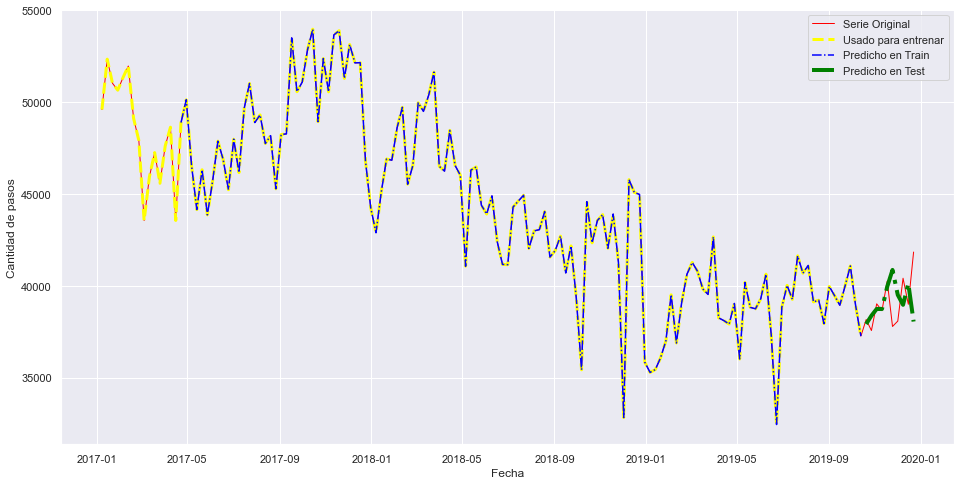

RMSE XGB en Train: 0.07978924935395143
RMSE XGB en Test: 1734.7105779765925


In [109]:
plt.figure(figsize=(16,8))
plt.plot(sen.index[:length_total], sen[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(sen.index[:N_train + lb], sen[:N_train + lb],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(sen.index[lb: lb + N_train], trainxp,'-.',color='blue',label = 'Predicho en Train')
plt.plot(sen.index[N_train+lb: length_total], testxp,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, trainxp))
print('RMSE XGB en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, testxp))
print('RMSE XGB en Test:',rmse)

In [110]:
param_xgb={'n_estimators':[15, 25, 50, 100, 150, 200],
            'max_depth': [4,6,8,10],
            'learning_rate': [0.1,0.2,0.3,0.4],
            'colsample_bytree ': [0.3,0.5,0.7,1],
            'subsample': [0.3,0.5,0.7,0.9,1],
            'reg_lambda': [1,2,3],
            'n_thread': [4]}

In [111]:
model1= GridSearchCV(xgb, param_grid= param_xgb, cv=ts, n_jobs=-2)

In [112]:
model1.fit(X_train,y_train)

[19:05:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { colsample_bytree , n_thread } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=2),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraint...
                                    num_parallel_tree=1, random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             n_jobs=-2,
  

In [113]:
print("Mejores parametros: "+str(model1.best_params_))

Mejores parametros: {'colsample_bytree ': 0.3, 'learning_rate': 0.4, 'max_depth': 4, 'n_estimators': 50, 'n_thread': 4, 'reg_lambda': 3, 'subsample': 0.3}


In [114]:
xgb_op= XGBRegressor(colsample_bytree=0.3, learning_rate=0.4, max_depth=4, n_estimators=50, n_thread=4, reg_lambda=3, subsample=0.3, random_state=42)

In [115]:
xgb_op.fit(X_train, y_train)

[19:12:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { n_thread } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.4, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=0, n_thread=4, num_parallel_tree=1,
             random_state=42, reg_alpha=0, reg_lambda=3, scale_pos_weight=1,
             subsample=0.3, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [116]:
testxp1= xgb_op.predict(X_test)
trainxp1=xgb_op.predict(X_train)

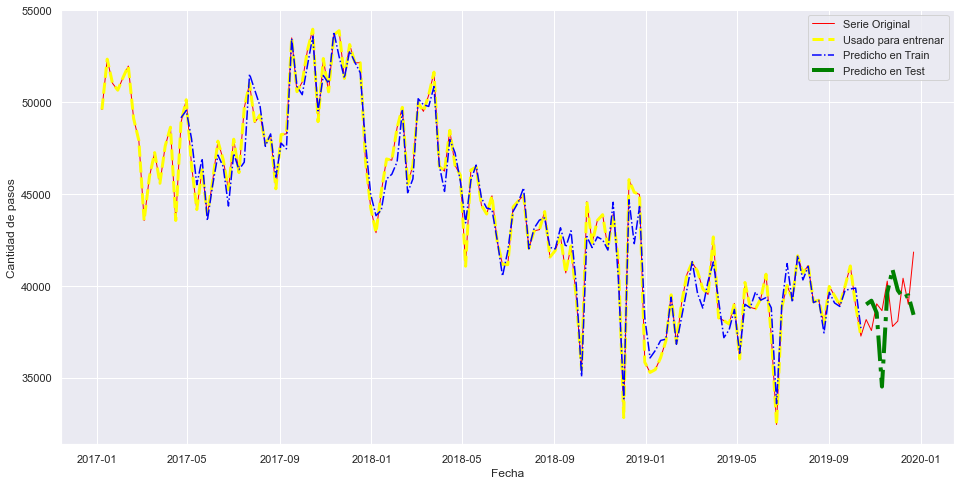

RMSE XGB en Train: 867.6412156217185
RMSE XGB en Test: 2158.130690064235


In [117]:
plt.figure(figsize=(16,8))
plt.plot(sen.index[:length_total], sen[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(sen.index[:N_train + lb], sen[:N_train + lb],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(sen.index[lb: lb + N_train], trainxp1,'-.',color='blue',label = 'Predicho en Train')
plt.plot(sen.index[N_train+lb: length_total], testxp1,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, trainxp1))
print('RMSE XGB en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, testxp1))
print('RMSE XGB en Test:',rmse)

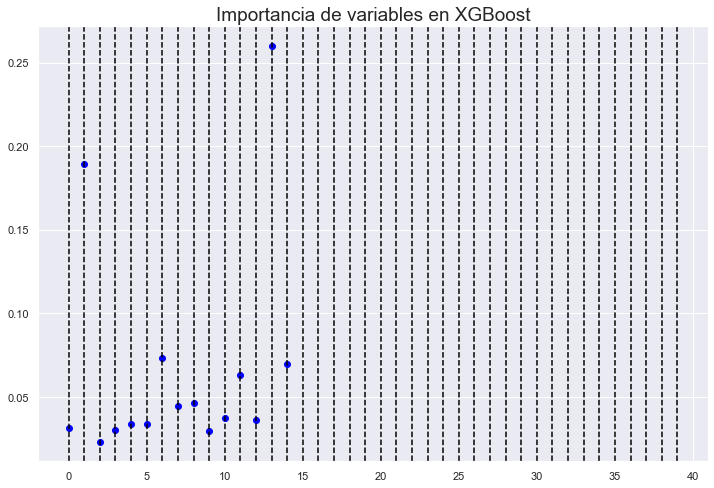

In [118]:
plt.figure(figsize=(12,8))
plt.scatter(np.arange(xgb_op.feature_importances_.size), xgb_op.feature_importances_, color='Blue')
plt.title('Importancia de variables en XGBoost', size= 19)
for x in range(40): # Veremos solamente 40 semanas para que el gráfico sea mas legible 
    plt.axvline(x, linestyle= '--', color='black')
plt.show()

In [119]:
# El modelo no se ajusta como lo esperamos 

In [120]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

In [121]:
rfg = RandomForestRegressor(random_state=42)
rfg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [122]:
testrp = rfg.predict(X_test)
trainrp = rfg.predict(X_train)

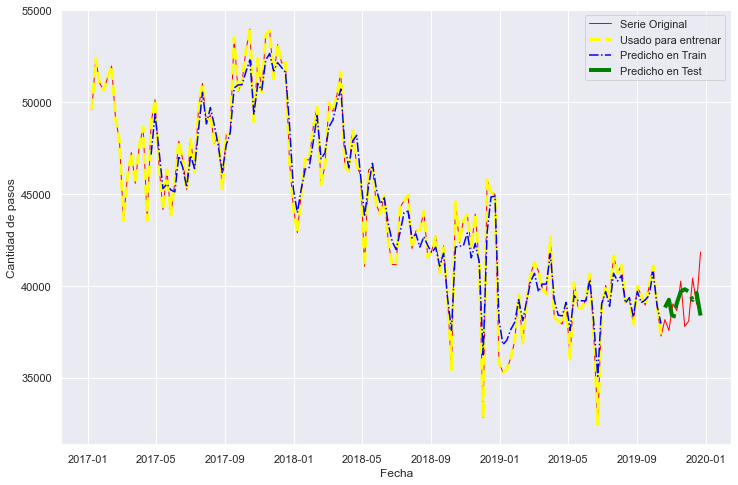

RMSE en Train: 1035.8303979278712
RMSE en Test: 1581.9230101798648


In [124]:
plt.figure(figsize=(12,8))
plt.plot(sen.index[:length_total], sen[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(sen.index[:N_train + lb], sen[:N_train + lb],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(sen.index[lb: lb + N_train], trainrp,'-.',color='blue',label = 'Predicho en Train')
plt.plot(sen.index[N_train+lb: length_total], testrp,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, trainrp))
print('RMSE en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, testrp))
print('RMSE en Test:',rmse)

In [125]:
# Parece que el modelo se desempeña mejor que el XGBoost
# el RMSE es menor y la diferencia entre train y test también

In [126]:
param_rfg = {'n_estimators':[ 20, 50,100,200],
               'max_depth': [i for i in range(2,20)],
               'max_features': ['auto', 'sqrt', 'log2'], 
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4, 6]}

In [127]:
model2 = GridSearchCV(rfg, param_grid= param_rfg, n_jobs=-2, cv=ts)

In [128]:
model2.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=2),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-2,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100, 200]})

In [129]:
print("Mejores parametros: "+str(model2.best_params_))
print("Mejor Score: "+str(model2.best_score_)+'\n')

Mejores parametros: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mejor Score: -0.6977645810959417



In [136]:
rfg_op = RandomForestRegressor(max_depth= 8, max_features='auto', min_samples_split= 3, n_estimators= 100, min_samples_leaf= 3)

In [137]:
rfg_op.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=3)

In [138]:
testrp1 = rfg_op.predict(X_test)
trainrp1= rfg_op.predict(X_train)

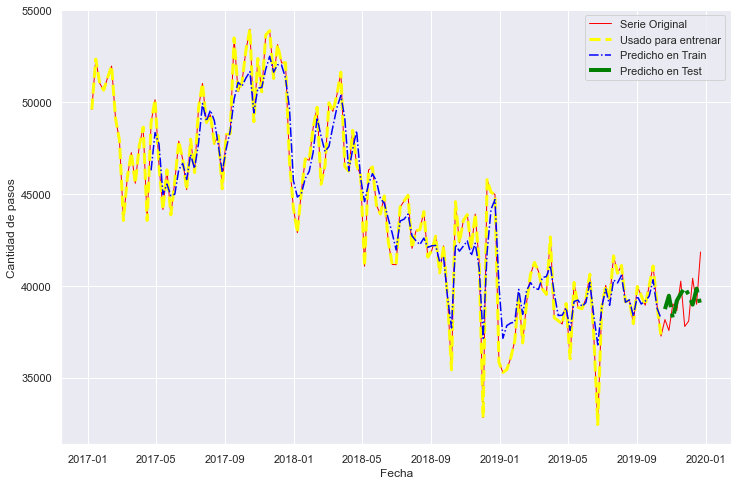

RMSE en Train: 1398.0253340504005
RMSE en Test: 1525.5525150068795


In [139]:
plt.figure(figsize=(12,8))
plt.plot(sen.index[:length_total], sen[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(sen.index[:N_train + lb], sen[:N_train + lb],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(sen.index[lb: lb + N_train], trainrp1,'-.',color='blue',label = 'Predicho en Train')
plt.plot(sen.index[N_train+lb: length_total], testrp1,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, trainrp1))
print('RMSE en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, testrp1))
print('RMSE en Test:',rmse)

In [140]:
# No se obtiene un mejor resultado, estos no son modelos oara series de tiempo
# Pasaremos a un modelo ARIMA para obtener mejores resultados

In [141]:
# ARIMA
# Se espera que este sea el mejor modelo, pues se ajusta de mejor manera a las series de tiempo
# Se utilizara el método promedios móviles integrados autorregresivos estacionales

In [142]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import itertools
from tqdm import tqdm_notebook

In [143]:
y = sema_m
y.head()

,cantidad_pasos
fecha,
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
2017-02-05,51343.000000


In [144]:
# Combinaciones parametros
d=range(0,3)
p=q=range(7,16)
pdq=list(itertools.product (p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)
              for x in list(itertools.product (p,d,q)) ]
print('Ejemplos de combinaciones de parametros para SARIMAX ....')
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[4]))

Ejemplos de combinaciones de parametros para SARIMAX ....
SARIMAX:(7, 0, 8) x (7, 0, 8, 12)
SARIMAX:(7, 0, 8) x (7, 0, 9, 12)
SARIMAX:(7, 0, 9) x (7, 0, 10, 12)
SARIMAX:(7, 0, 9) x (7, 0, 11, 12)


In [145]:
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod=sm.tsa.statespace.SARIMAX (y,
#                                            order= param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)
#             results=mod.fit()
            
#             print('SARIMAX{}x{} - AIC:{}'.format(param,param_seasonal, results.aic))
            
#         except:
#             continue

In [146]:
y= sema_m.cantidad_pasos
model = sm.tsa.statespace.SARIMAX(y,
                                order=(10, 1, 8),
                                seasonal_order=(10, 1, 8, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultado = model.fit()
print(resultado.summary())

/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                       cantidad_pasos   No. Observations:                  156
Model:             SARIMAX(10, 1, 8)x(10, 1, 8, 12)   Log Likelihood                -118.559
Date:                              Tue, 27 Apr 2021   AIC                            311.118
Time:                                      18:32:24   BIC                            332.022
Sample:                                  01-08-2017   HQIC                           306.822
                                       - 12-29-2019                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4272     49.091     -0.009      0.993     -96.643      95.789
ar.L2         -0.41

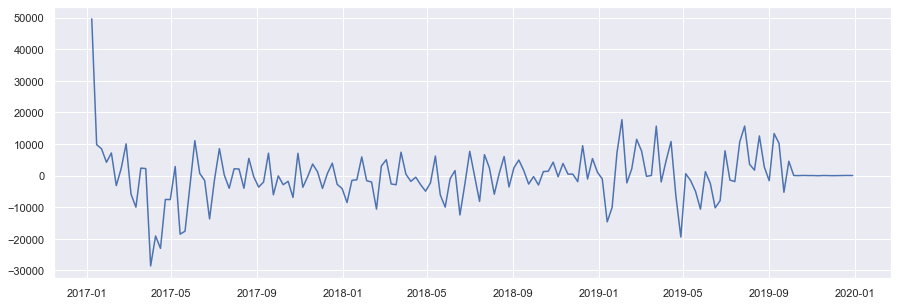

In [147]:
plt.figure(figsize=(15,5))
plt.plot(resultado.resid)
plt.show()

In [148]:
# Gráfico anterior es que los errores no tengan una correlación, y que la media y su distribución sea 0.

# Residuo estandarizado y la media 0
# La distribución de los errores es 0
# Comportamiento lineal

# Modelo adecuado, ya podemos predecir

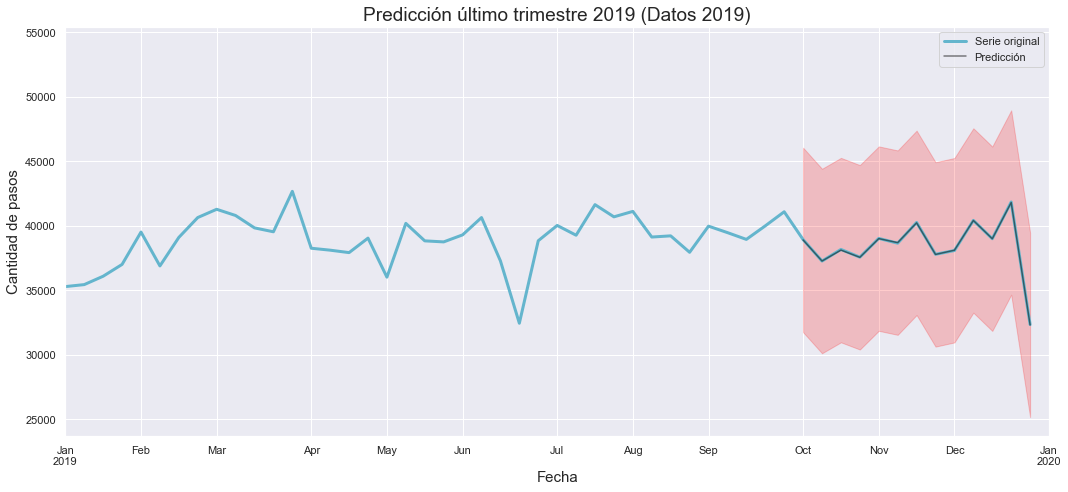

In [150]:
pred = resultado.get_prediction(start= datetime.datetime(2019, 10, 6), dynamic= False) # Dynamic en False es para One-Step
c_pred = pred.conf_int()

ax= y['2017': ].plot(label='Serie original', color= 'c', lw=3, figsize=(15,7))

pred.predicted_mean.plot(ax=ax, label='Predicción', alpha=0.5, color='Black')

ax.fill_between(c_pred.index,
                c_pred.iloc[:,0],
                c_pred.iloc[:,1], color='red', alpha=0.2)
plt.title('Predicción último trimestre 2019 (Datos 2019)', size=19)
plt.xlabel('Fecha', size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.xlim(datetime.datetime(2019,1,1), datetime.datetime(2019, 12, 31))
plt.legend()
plt.tight_layout()
plt.show()

In [151]:
y_predf = pred.predicted_mean
y_real = y['2019-10-06':]

error_one = np.sqrt(mean_squared_error(y_predf, y_real))
print('RMSE de One Step 2019: ', error_one)

RMSE de One Step 2019:  27.030737280295835


In [152]:
# Error de 27 es bueno, por el tipo de modelo este era el resultado esperado

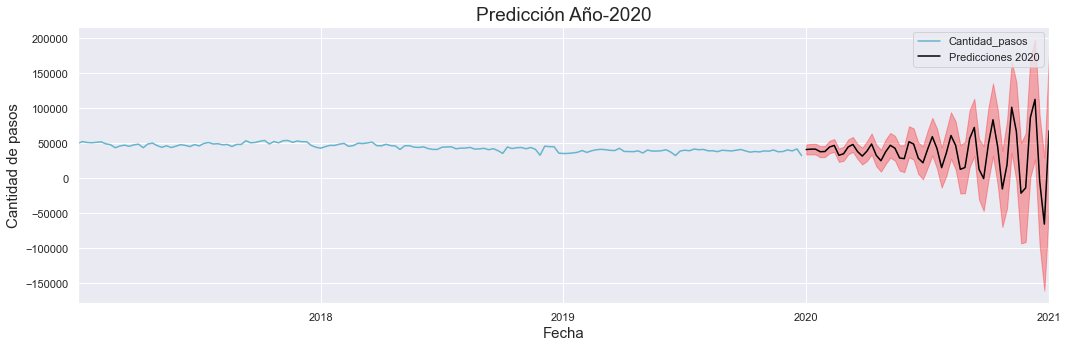

In [155]:
# Prediccion para el año 2020, el resultado esta sesgado ya que no cuenta con la realidad de la coyuntura y sus restricciones en movilidad
pred_f = resultado.get_forecast(steps=datetime.datetime(2020,12,31))
c_predf = pred_f.conf_int()

ax = y.plot(label='Cantidad_pasos', color='c',figsize=(15,5))
pred_f.predicted_mean.plot(ax=ax, label='Predicciones 2020', color='Black')
ax.fill_between(c_predf.index,
                c_predf.iloc[:, 0],
                c_predf.iloc[:, 1], color='red', alpha=.3)
plt.title("Predicción Año-2020", fontsize=19)
ax.set_xlabel('Fecha', size=15)
ax.set_ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

In [154]:
# Modelo se hace menos preciso con el tiempo, ya que que los intervalos de confianza se hacen más grandes

In [156]:
# Analisis y conclusiones finales
# Nuestro modelo se ajusta bien para los primeros meses de la predicción
# Por la coyuntura (COVID-19) es muy dificl que un modelo pronostique un cambio exogeno e inesperado
# Se ajusta bien de igual manera, si no tenemos en cuenta desde el momento de la primera resticcion de movilidad
# Las series de tiempo son arriesgada de usar, no podemos pronosticar cambios exogenos aleatorios
# se pueden utilizar y pronostican bien, pero los pronosticos a periodos lejanos de tiempo se hacen menos precisos

In [1]:
# Pasos a seguir y resultados esperados
# Como pasos a seguir se deberían volver a correr los modelos
# incluyendo el año 2020 y buscando obtener un modelo más preciso para pronosticar el 2021 
# Este contaria con datos registrados durante la coyuntura (COVID)
# Se esperaría un modelo más preciso, ya que incluye datos de un evento inesperado
# El modelo se ajustaría de mejor manera a la realidad
# Las herramientas que nos podria ayudar en esta nueva construcción de modelo serian: 
# Facebook prophet y/o las Redes Neuronales y ver que comportamiento nos muestra el modelo nuevo
# Para los resultado debemos seguir teniendo en cuenta que capturar una tendencia 
# de acuerdo a data del pasado tiene riesgos y estos riesgos son: las externalidades
# ya que estas pueden ocurrir sin avisar, son eventos exogenos que no se contemplen en data registrada en el pasado
# y afecten la tendencia que queremos pronosticar
# por esto queremos incluir data del 2020 y evaluar si logramos un modelo con tendencia más cercana a la realidad